In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import poisson
from scipy import fftpack

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

3.4661629670697414


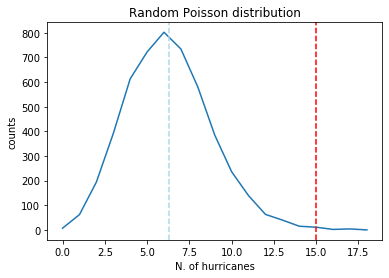

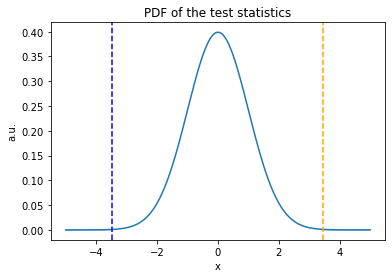

p-value = 0.0005279431738299246


In [3]:
mu = 6.3
x0 = 15

X = np.random.poisson(mu, 5000)
bins = np.arange(0, 20, 1)
h1,_ = np.histogram(X, bins=bins)
plt.plot(h1)
plt.xlabel('N. of hurricanes')
plt.ylabel('counts')
plt.title("Random Poisson distribution")

plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')


stdev = np.sqrt(mu)  #standard deviation for a Poisson distribution
Z = (x0 - mu)/stdev
print(Z)


#plot the test statistics
xs = np.linspace(-5, +5, 5000)
ts = stats.norm.pdf(xs)
plt.figure()
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.title("PDF of the test statistics")
plt.show()

# calculate the p-value 
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)

The p-value is smaller than the confidence level (alpha = 0.05), so the null hypothesis is rejected. We can conclude that 15 hurricanes deviate significantly from the statistical average mean value. 

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Sigma =  11.04158805003459
T =  -3.786997938137629


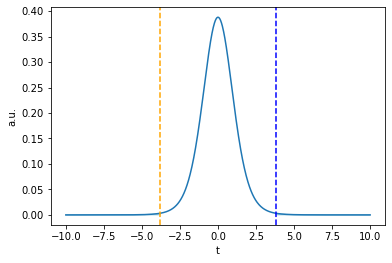

p-value = 0.004302464132864604


In [5]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100]) 
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))
mean_pre = np.mean(pre)
mean_post = np.mean(post)

n = len(pre)

sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)
print("Sigma = ", sigma)
T = (mean_pre - mean_post)/(sigma * np.sqrt(2/n))
print("T = ", T)

#perform the test statistics
xs = np.linspace(-10, +10, 1000)
ts = stats.t.pdf(xs, n-1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# p-value: 
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

Choosing a confidence level (C.L) of 0.05 we have that our p-value is smaller than the C.L, so we reject the null hypothesis. Therefore the change in blood pressure is statistically significant. 

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Peak frequency for hares: 0.09523809523809523
Peak frequency for lynxes: 0.09523809523809523
Period of hares population: 10.5  years
Period of lynxes population: 10.5  years


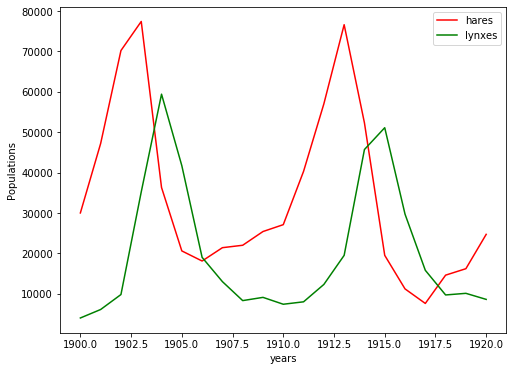

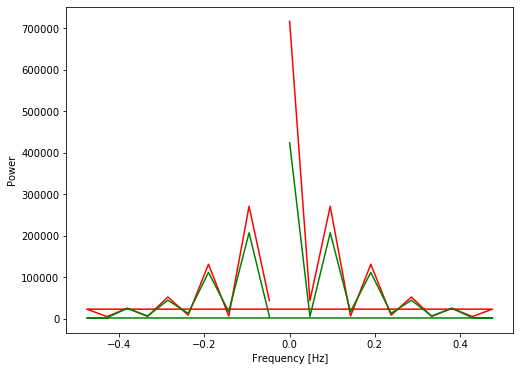

In [6]:
#read data file
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T
#!cat data/populations.txt

#plot hares and lynxes populations
plt.figure(figsize=(8,6))
plt.plot(year, hares, color = "red", label='hares')
plt.plot(year, lynxes, color = "green", label='lynxes')
plt.xlabel('years')
plt.ylabel('Populations')
plt.legend(loc='best')

#fft
fft_hares = fftpack.fft(hares)
fft_lynxes = fftpack.fft(lynxes)

#power
p_hares = np.abs(fft_hares)
p_lynxes = np.abs(fft_lynxes)

#frequency
freq_hares = fftpack.fftfreq(hares.size, d=1)
freq_lynxes = fftpack.fftfreq(lynxes.size, d=1)

# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(freq_hares, p_hares, color="red")
plt.plot(freq_lynxes, p_lynxes, color="green")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

# Find the peak frequency: focus only on only the positive frequencies
pos_mask_hares = np.where(freq_hares > 0)
freqs_hares = freq_hares[pos_mask_hares]
powes_hares = p_hares[pos_mask_hares]
pos_mask_lynxes = np.where(freq_lynxes > 0)
freqs_lynxes = freq_lynxes[pos_mask_lynxes]
powes_lynxes = p_lynxes[pos_mask_lynxes]

# find the max of freqs array
peak_freq_hares = freqs_hares[powes_hares.argmax()]
print("Peak frequency for hares:", peak_freq_hares)
peak_freq_lynxes = freqs_lynxes[powes_lynxes.argmax()]
print("Peak frequency for lynxes:", peak_freq_lynxes)

#find the period
T_hares = 1 / peak_freq_hares
print("Period of hares population:", T_hares, " years")
T_lynxes = 1 / peak_freq_lynxes
print("Period of lynxes population:", T_lynxes, " years")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

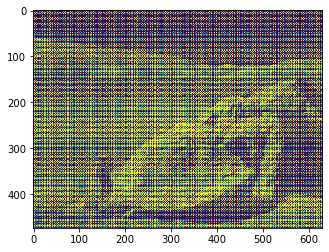

In [7]:
from matplotlib.colors import LogNorm

#import the image
img = plt.imread("moonlanding.png")
plt.imshow(img)

Text(0.5, 1.0, '2D Fourier transform')

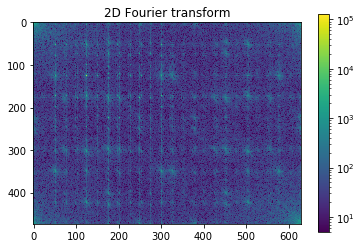

In [8]:
imgFFT = fftpack.fft2(img)
power = np.abs(imgFFT)

plt.imshow(power, norm=LogNorm(vmin=5))
plt.colorbar()
plt.title("2D Fourier transform")

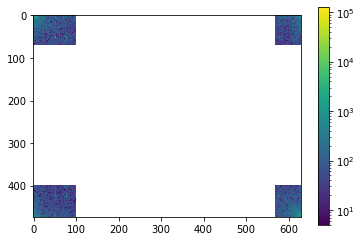

In [9]:
#set the noise regions to zero
imgFFT[70:400] = 0
imgFFT[:, 100:570] = 0

plt.imshow(np.abs(imgFFT), norm=LogNorm(vmin=5))
plt.colorbar()

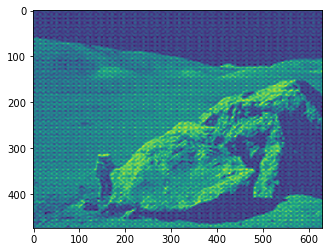

In [11]:
#apply the inverse 2D FFT and plot the final image
imgFin = fftpack.ifft2(imgFFT)
plt.imshow(np.abs(imgFin))